In [3]:
!pip install seaborn

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [7]:
data = pd.read_csv('Iris.csv')

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data['Species'].value_counts() #Counting The No.Of.Species

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

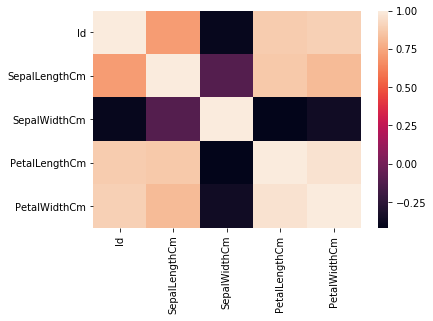

In [57]:
sns.heatmap(data.corr())

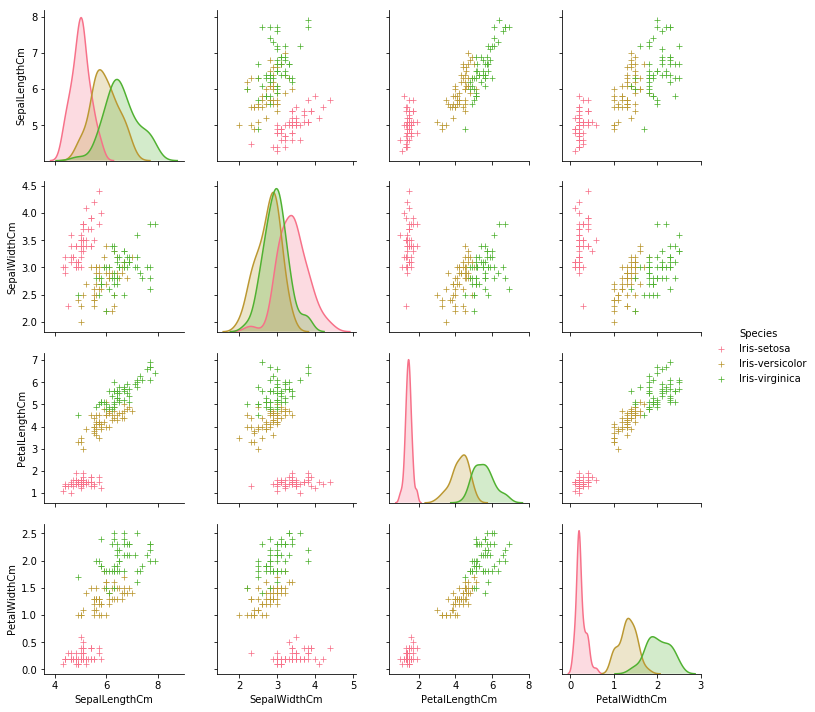

In [15]:
#Data Visualization
tmp = data.drop('Id',axis=1) #it drops 'Id' coloumn 
g = sns.pairplot(tmp,hue='Species',markers='+')
plt.show()

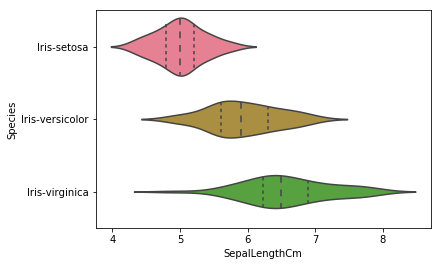

In [21]:
sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()

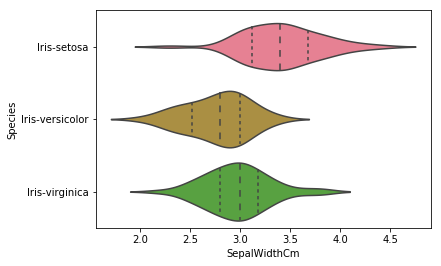

In [22]:
sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()

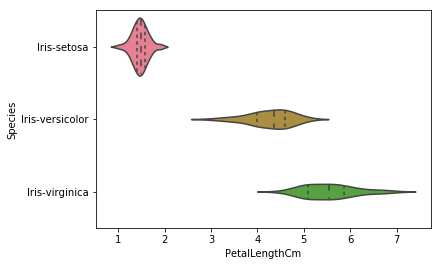

In [23]:
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()


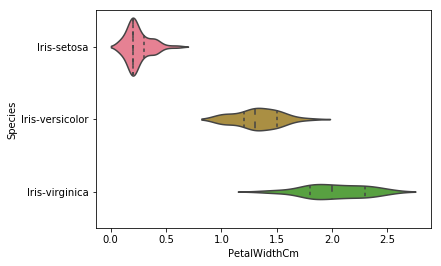

In [24]:
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

In [32]:
x = data.drop(['Id','Species'],axis=1) 
y = data['Species']
print(x.head())
print(" ")
print(y.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
 
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


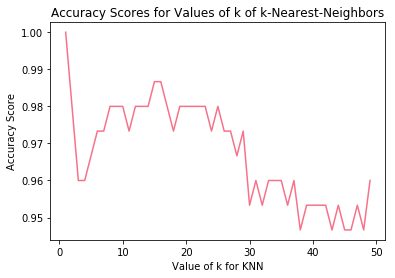

In [41]:
# experimenting with different n values
k_range = list(range(1,50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(75, 4)
(75,)
(75, 4)
(75,)


In [51]:
#experimenting n differnt values 
k_range = list(range(1,50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    


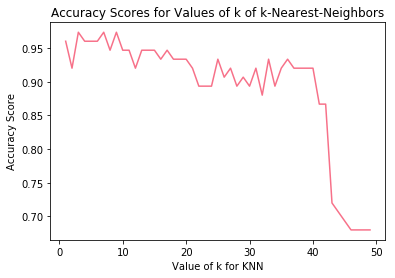

In [52]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [53]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test) 
print(metrics.accuracy_score(y_test,y_pred))

0.8933333333333333


In [55]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x, y)
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)